## CP 3.2 - Data Science and Statistical Computing  

**Fernanda Saito (rm551104)**   
**Lucas Toledo (rm97913)**



Inicialmente, realizamos as importações de todas as bibliotecas que serão usados no decorrer desse notebook.
- **Pandas:** Biblioteca para manipulação e análise de dados
- **Seaborn e Matplotlib:** Bibliotecas para vizualização de dados,criação de gráficos.
- **Sklearn:** Biblioteca para utilização de IA (ML), classificações e regressões



In [1]:
# Importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Abertura do dataset

Obtenção dos dados.  
O dataset foi obtido no Kaggle. É possível encontrá-lo no link: https://www.kaggle.com/datasets/iamtanmayshukla/healthcare-no-shows-appointments-dataset?resource=download  
Este dataset contém informações em relação ao comparecimento ou não de pacientes em suas consultas agendadas.


In [2]:
# Lê o dataset e exibe as primeiras linhas utilizando head()
data = pd.read_csv('healthcare_noshows_appt.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


Explicação das colunas:
- PatientId - código de identificação único do paciente
- AppointmentID - código de identificação único da consulta
- Gender - Gênero do paciente
- ScheduleDay - Data em que a consulta foi agendada
- AppointmentDay - Data agendada para consulta
- Age - Idade do paciente
- Neighbourhood - Bairro em que o paciente reside
- Scholarship - Bolsa de estudos/ apoio financeiro
- Hipertension - Paciente possui hipertensão?
- Diabetes - Paciente possui diabetes?
- Alcoholism - Paciente possui problemas de alcolismo?
- Handcap - Paciente possui deficiência?
- SMS_received - Paciente recebeu mensagem de confirmação ou lembrete?
- Showed_up - Paciente compareceu?
-Date.diff - Quantidade de dias corridos entre o agendamento e a data agendada.

# Análise inicial e limpeza dos dados

Aqui, é informado o tipo de dado de cada coluna do dataset. Além disso, a partir do describe() temos dados para estatística descritiva.

- Count: contagem total
- std (desvio padrão): mede a dispersão dos dados em relação à média, mostrando o quão concentrados ou dispersos os valores estão  
- min: menor valor
- 25% (1º quartil): 25% dos dados são menores ou iguais a esse valor.
- 50% (2º quartil): 50% dos dados estão abaixo deste valor.
- 75% (3º quartil): 75% dos dados estão abaixo desse valor.
- max: maior valor

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


Este relatório apresenta uma descrição estatística de todas as variáveis numéricas do conjunto de dados. A soma das idades de todos os pacientes totaliza 106.987, e observamos também a diferença de datas. Os IDs dos pacientes e das consultas não são relevantes para esta análise. O desvio padrão das idades é de 22,5%, indicando que os dados estão bastante dispersos, com uma variação significativa nos valores. Em contraste, o desvio padrão da diferença de datas (data agendada - data de agendamento) é de 10%, o que sugere que os dados estão mais concentrados em torno da média.

A menor idade registrada é 1 ano, enquanto a maior é 115 anos. Quanto à diferença entre as datas, o menor valor é -6 dias (indicando um erro, uma vez que a data de agendamento é posterior à data da consulta), e o maior é de 179 dias.

Analisando os quartis, podemos observar que 25% dos valores de idade são menores ou iguais a 19, 50% são menores ou iguais a 38, e 75% são menores ou iguais a 38. Em relação às datas, 25% dos valores são menores ou iguais a 0, 50% são menores ou iguais a 4, e 75% são menores ou iguais a 14.

A partir da análise das tabelas acima, já podemos ter uma breve visão dos dados, facilitando a limpeza dos dados. É possível verificar, por exemplo, que não será necessário converter o formato de nenuma coluna, pois todas estão de acordo com o padrão.



---



In [4]:
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


Na célula acima, foram exibidas as quantidades de valores nulos por coluna. Neste caso em específico, o dataset utilizado está com dados, em sua maioria já limpos, uma vez que não contém nenhum valor nulo.



---



In [20]:
# Convertendo as colunas para o formato datetime
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')

In [5]:
# Remover duplicatas com base em uma combinação de colunas
data = data.drop_duplicates(subset=['PatientId', 'AppointmentID'], keep='first')

# Verificar novamente para garantir que não há duplicados
print(data.duplicated().sum())


0




---



In [6]:
# Exemplo: Remover valores incoerentes para a idade
data = data[(data['Age'] >= 0) & (data['Age'] <= 120)]

# Verificar se há valores inconsistentes
print(data['Age'].describe())


count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64


In [7]:
# Remoção de colunas que não serão utilizadas nas análises
data = data.drop(columns=['PatientId', 'AppointmentID','Date.diff'])

data

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True
106983,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True
106984,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True
106985,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True




---



# Machine Learning com Scikit-learn

Regressão Logística e Árvore de Decisão
1. **Definindo Variáveis Independentes (X) e Dependentes (y)**:
   - As variáveis independentes (X) incluem: Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap.
   - A variável dependente (y) é: Showed_up

2. **Dividindo os Dados**:
   - Os dados serão divididos em conjuntos de treinamento e teste, com 70% dos dados utilizados para treinar os modelos e 30% para testá-los.

3. **Modelo de Regressão Logística**:
   - Um modelo de Regressão Logística será criado e treinado utilizando o conjunto de treinamento. Após o treinamento, o modelo fará previsões com base no conjunto de teste.

4. **Modelo de Árvore de Decisão**:
   - Em seguida, um modelo de Árvore de Decisão será criado e treinado da mesma forma. As previsões serão feitas utilizando o conjunto de teste e a acurácia do modelo também será avaliada.

5. **Comparando os Resultados**:
   - Após os testes, resultados de acurácia dos dois modelos serão exibidos para comparação.

Com este processo, esperamos identificar qual modelo é mais eficaz na previsão da presença dos pacientes nas consultas médicas.


In [9]:
# Definindo variáveis independentes (X) e dependentes (y)
X = data[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']]
y = data['Showed_up']

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Modelo de Regressão Logística
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)

# Avaliando o modelo
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Modelo de Árvore de Decisão
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# Avaliando o modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Comparando os resultados
print(f'Acurácia do Modelo de Regressão Logística: {accuracy_logistic}')
print(f'Acurácia do Modelo de Árvore de Decisão: {accuracy_tree}')


Acurácia do Modelo de Regressão Logística: 0.7967411284543727
Acurácia do Modelo de Árvore de Decisão: 0.7946537059538274



Após a implementação dos modelos de aprendizado de máquina, obtemos as seguintes acurácias: a **Regressão Logística** alcançou uma acurácia de 79,6%, enquanto a **Árvore de Decisão** apresentou uma acurácia de 79,4%. Esses resultados indicam que ambos os modelos são eficazes na previsão da presença dos pacientes nas consultas médicas. Esses insights são importantes para entender os fatores que influenciam o comparecimento às consultas e podem ser úteis para melhorias melhorias em futuras análises preditivas.

# Análises e repostas das 10 perguntas

### 1. Qual é a proporção de pacientes que compareceram às consultas médicas em relação ao total agendado?

Cálculo da Proporção de Comparecimento de Pacientes

1. **Contagem Total de Pacientes Agendados**: Usaremos `data.shape[0]` para obter o número total de pacientes que foram agendados.

2. **Contagem de Pacientes que Compareceram**: Faremos uma filtragem dos dados para contar quantos pacientes efetivamente compareceram, utilizando `data[data['Showed_up'] == 1].shape[0]`.

3. **Cálculo da Proporção de Comparecimento**: A proporção de pacientes que compareceram será calculada dividindo o total de comparecimentos pelo total de agendamentos.


In [10]:
# Calculando a proporção de pacientes que compareceram
total_agendados = data.shape[0]
total_compareceram = data[data['Showed_up'] == 1].shape[0]

proporcao_comparecimento = total_compareceram / total_agendados
print(f"A proporção de pacientes que compareceram é: {proporcao_comparecimento:.2%}")


A proporção de pacientes que compareceram é: 79.74%


A proporção de pacientes que compareceram às consultas médicas é de **79,74%**. Este valor indica uma adesão significativa por parte dos pacientes, sugerindo que a maioria deles compareceu às consultas agendadas.

Esse alto percentual de comparecimento pode ser entendido de várias maneiras: pode refletir uma boa comunicação entre a equipe de saúde e os pacientes, bem como a efetividade das estratégias de lembretes e agendamentos. Além disso, uma taxa de comparecimento tão elevada é benéfica para a continuidade do tratamento e acompanhamento da saúde dos pacientes, resultando em melhores desfechos clínicos.





---

### 2.Existe alguma relação entre a idade dos pacientes e a probabilidade de comparecimento?

Análise do Comparecimento de Pacientes

1. **Filtragem dos Pacientes que Não Compareceram**: Vamos criar um novo DataFrame apenas com os pacientes que não compareceram (`Showed_up == 0`).

2. **Gráfico de Distribuição de Idade**: Utilizaremos um histograma para visualizar a distribuição das idades dos pacientes que não compareceram, com a adição de uma linha de densidade (KDE) para identificar padrões.

3. **Boxplot por Faixa Etária**: A idade dos pacientes será dividida em faixas etárias (0-18, 19-30, 31-50, 51-70 e 71+). Um gráfico de barras será gerado para mostrar a taxa de comparecimento em cada faixa etária.

4. **Densidade de Idade**: Utilizaremos gráficos de densidade (KDE) para comparar a distribuição de idades entre os pacientes que compareceram e os que não compareceram, permitindo uma visualização clara das diferenças.

5. **Correlação de Spearman**: Finalmente, calcularemos a correlação de Spearman entre a idade dos pacientes e o comparecimento. Isso nos dará uma ideia de como a idade pode influenciar a probabilidade de comparecimento às consultas.

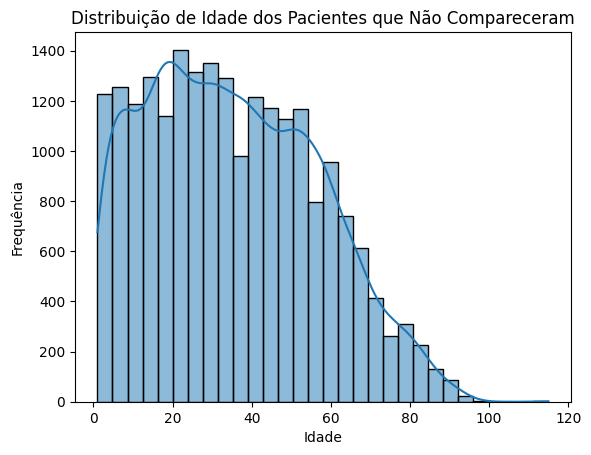

<ipython-input-26-4c6723d0e011>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Faixa_Etaria', y='Showed_up', data=data, ci=None)


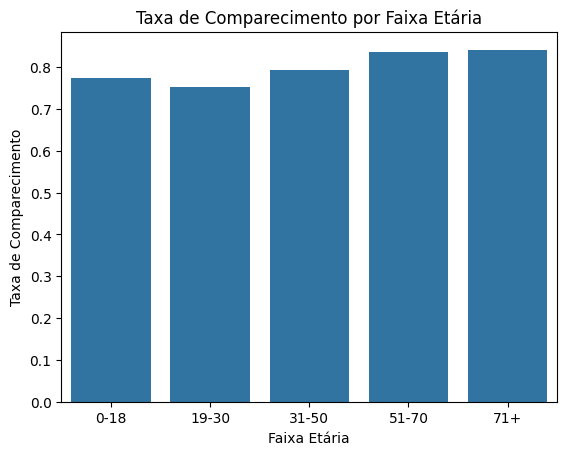

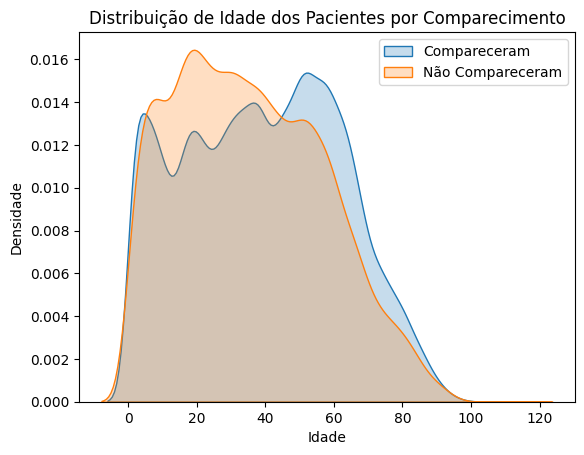

Correlação de Spearman entre idade e comparecimento: 0.07, p-valor = 0.00000000


In [26]:

# Filtrando apenas os pacientes que não compareceram
nao_compareceram = data[data['Showed_up'] == 0]

# Gráfico de distribuição de pacientes por idade para os que não compareceram
sns.histplot(nao_compareceram['Age'], bins=30, kde=True)
plt.title('Distribuição de Idade dos Pacientes que Não Compareceram')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# 1. Boxplot por faixa etária
data['Faixa_Etaria'] = pd.cut(data['Age'], bins=[0, 18, 30, 50, 70, 100], labels=['0-18', '19-30', '31-50', '51-70', '71+'])
sns.barplot(x='Faixa_Etaria', y='Showed_up', data=data, ci=None)
plt.title("Taxa de Comparecimento por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Taxa de Comparecimento")
plt.show()

# 2. Densidade de idade para os grupos de comparecimento
sns.kdeplot(data=data[data['Showed_up'] == 1], x='Age', label='Compareceram', fill=True)
sns.kdeplot(data=data[data['Showed_up'] == 0], x='Age', label='Não Compareceram', fill=True)
plt.title("Distribuição de Idade dos Pacientes por Comparecimento")
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.legend()
plt.show()

# 3. Correlação de Spearman
from scipy.stats import spearmanr

spearman_corr, spearman_p = spearmanr(data['Age'], data['Showed_up'])
print(f"Correlação de Spearman entre idade e comparecimento: {spearman_corr:.2f}, p-valor = {spearman_p:.8f}")


Análise do Comparecimento de Pacientes com Base na Faixa Etária



 **Faixa Etária de 20 a 40 Anos**:  
  Os dados indicam que pacientes na faixa etária de 20 a 40 anos tendem a faltar mais às consultas. Esse padrão pode ser atribuído a diversos fatores, como compromissos profissionais, responsabilidades familiares ou uma percepção de menor necessidade de cuidados médicos regulares nessa faixa etária. Além disso, jovens adultos podem subestimar a importância de manter consultas médicas preventivas, o que contribui para a taxa mais elevada de ausências.

**Idosos (Acima de 60 Anos)**:  
   Em contraste, os idosos demonstram uma maior taxa de comparecimento. Este comportamento pode ser explicado por uma maior preocupação com a saúde nessa fase da vida, juntamente com a necessidade de acompanhamento médico mais frequente. A presença de condições crônicas também pode levar os idosos a priorizarem suas consultas, além de muitas vezes serem acompanhados por familiares que garantem sua presença.

**Crianças e Adolescentes**:  
A análise também sugere que as crianças e adolescentes tendem a comparecer mais às consultas, geralmente acompanhados por um responsável. Essa supervisão parental é de extrema importancia, pois garante que as crianças recebam os cuidados necessários. Além disso, os pais costumam ser mais proativos em levar seus filhos a consultas médicas, especialmente quando se trata de vacinação e monitoramento do crescimento.

**Conclusão**  
A análise das taxas de comparecimento revela comportamentos distintos entre diferentes faixas etárias. Podemos implementar ações direcionadas para melhorar a adesão às consultas médicas,como campanhas de conscientização e suporte para idosos. Focar na educação e engajamento de grupos com maior taxa de ausência é essencial para garantir que todos os pacientes recebam os cuidados de saúde necessários.




---


### 3. Como a hipertensão afeta a taxa de comparecimento a consultas?





Análise da Taxa de Não Comparecimento com Base na Hipertensão

Nesta seção, analisamos a taxa de não comparecimento dos pacientes às consultas médicas em relação à condição de hipertensão. O objetivo é entender se a presença de hipertensão influencia o comportamento dos pacientes em relação ao comparecimento.

1. **Filtragem dos Pacientes que Não Compareceram**: Criamos um DataFrame contendo apenas os pacientes que não compareceram (`Showed_up == 0`).
  
2. **Cálculo da Taxa de Não Comparecimento por Hipertensão**: Calculamos a taxa de não comparecimento separando os pacientes com e sem hipertensão. Utilizamos a função `value_counts(normalize=True)` para obter as proporções.

3. **Visualização**: Um gráfico de barras foi gerado para representar a taxa de não comparecimento em função da hipertensão, facilitando a comparação entre os dois grupos.



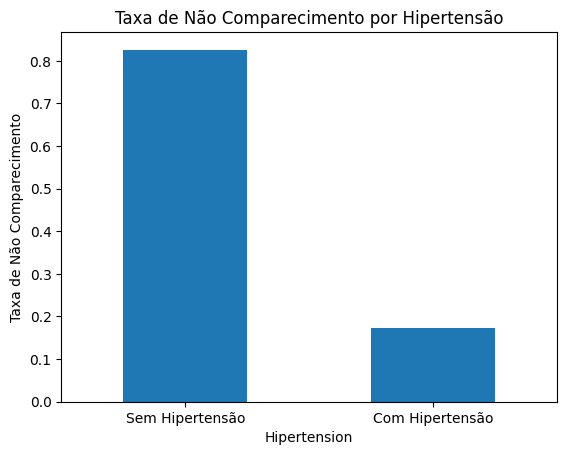

In [14]:
# Filtrando apenas os pacientes que não compareceram
nao_compareceram = data[data['Showed_up'] == 0]

# Análise da taxa de não comparecimento com base na hipertensão
taxa_nao_comparecimento_hipertensao = nao_compareceram['Hipertension'].value_counts(normalize=True)
taxa_nao_comparecimento_hipertensao.plot(kind='bar', title='Taxa de Não Comparecimento por Hipertensão')
plt.xticks(ticks=[0, 1], labels=['Sem Hipertensão', 'Com Hipertensão'], rotation=0)
plt.ylabel('Taxa de Não Comparecimento')
plt.show()



Os resultados mostram que os pacientes **com hipertensão** (taxa de 0.15) têm uma taxa de não comparecimento **significativamente menor** em comparação aos pacientes **sem hipertensão** (taxa de 0.8). Essa observação pode indicar que os pacientes com hipertensão estão mais conscientes da importância de monitorar sua saúde e, portanto, são mais propensos a comparecer às consultas médicas.

**Conscientização sobre a Saúde**: A menor taxa de não comparecimento entre pacientes hipertensos sugere que essa população está mais ciente da importância do acompanhamento médico, possivelmente devido à necessidade de monitoramento regular da pressão arterial e dos riscos associados à condição.

**Estratégias de Engajamento**: Essa informação pode ser utilizada para direcionar estratégias de engajamento e educação para pacientes que não apresentam hipertensão, incentivando-os a valorizar a saúde e a importância das consultas médicas regulares.

**Conclusão**

A análise da taxa de não comparecimento em relação à hipertensão revela comportamentos significativos que podem ser explorados para melhorar a adesão às consultas médicas.



---
### 4. Como a diabete afeta a taxa de comparecimento a consultas?


 Análise da Taxa de Não Comparecimento com Base na Diabetes

1. **Filtragem dos Pacientes que Não Compareceram**: Selecionamos os dados dos pacientes que não compareceram às consultas, utilizando a condição `Showed_up == 0`.
  
2. **Cálculo da Taxa de Não Comparecimento por Diabetes**: Determinamos a taxa de não comparecimento para pacientes com e sem diabetes, utilizando `value_counts(normalize=True)` para obter as proporções de cada grupo.

3. **Visualização**: Um gráfico de barras foi gerado para representar visualmente a taxa de não comparecimento em função da condição de diabetes, facilitando a comparação entre os dois grupos.


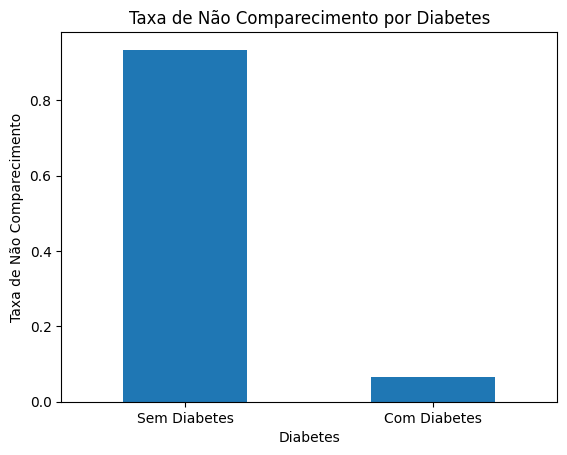

In [15]:
# Filtrando apenas os pacientes que não compareceram
nao_compareceram = data[data['Showed_up'] == 0]

# Análise da taxa de não comparecimento com base na diabetes
taxa_nao_comparecimento_diabetes = nao_compareceram['Diabetes'].value_counts(normalize=True)
taxa_nao_comparecimento_diabetes.plot(kind='bar', title='Taxa de Não Comparecimento por Diabetes')
plt.xticks(ticks=[0, 1], labels=['Sem Diabetes', 'Com Diabetes'], rotation=0)
plt.ylabel('Taxa de Não Comparecimento')
plt.show()


Os resultados indicam que os pacientes **com diabetes** (taxa de 0.1) apresentam uma taxa de não comparecimento **significativamente menor** em comparação aos pacientes **sem diabetes** (taxa de 0.9). Essa tendência pode ser interpretada de várias maneiras:

- Pacientes com diabetes geralmente têm uma necessidade maior de monitoramento e controle da doença. Isso pode levar a um maior compromisso em comparecer às consultas médicas, pois o acompanhamento regular é crucial para gerenciar a condição e evitar complicações.

- A educação sobre a diabetes e suas complicações potenciais pode também influenciar positivamente a adesão às consultas. Pacientes informados tendem a reconhecer a importância das consultas regulares.

**Implicações**

**Estratégias de Suporte**: A menor taxa de não comparecimento entre pacientes diabéticos sugere que intervenções de suporte, como lembretes de consultas e programas de educação em saúde, podem ser eficazes para encorajar outros grupos de pacientes a valorizarem a importância do acompanhamento médico.


**Conclusão**

A análise da taxa de não comparecimento em relação à diabetes revela que essa condição está associada a uma maior adesão às consultas médicas. Essa informação pode ser valiosa para desenvolver estratégias que incentivem todos os pacientes a priorizarem seus cuidados de saúde e a importância do comparecimento regular às consultas médicas.



---


### 5. Como o gênero dos pacientes influencia a taxa de comparecimento?




Análise da Taxa de Não Comparecimento por Gênero

1. **Contagem de Ocorrências por Gênero**: Calculamos a contagem de pacientes em cada gênero utilizando `value_counts()` para obter uma visão geral da distribuição.
  
2. **Filtragem dos Pacientes que Não Compareceram**: Selecionamos os dados dos pacientes que não compareceram às consultas (`Showed_up == 0`).

3. **Cálculo da Taxa de Não Comparecimento por Gênero**: Determinamos a taxa de não comparecimento para cada gênero, usando `value_counts(normalize=True)` para calcular as proporções.

4. **Visualização**: Um gráfico de barras foi gerado para mostrar visualmente a taxa de não comparecimento por gênero.

Contagem de ocorrências por gênero:
Gender
F    70118
M    36869
Name: count, dtype: int64


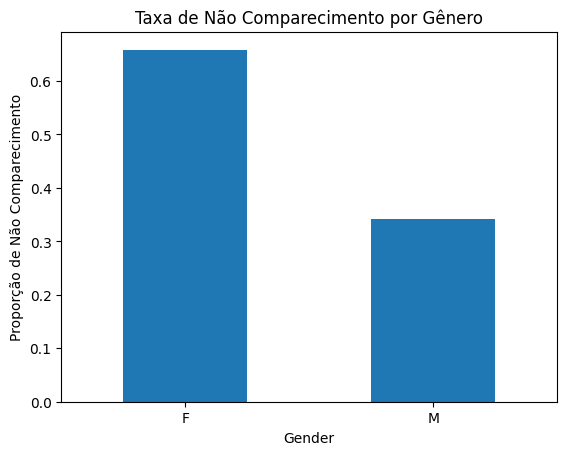

In [16]:
# Contagem de ocorrências por gênero
contagem_genero = data['Gender'].value_counts()
print("Contagem de ocorrências por gênero:")
print(contagem_genero)

# Filtrando apenas os pacientes que não compareceram
nao_compareceram = data[data['Showed_up'] == 0]

# Análise da taxa de não comparecimento por gênero
taxa_nao_comparecimento_genero = nao_compareceram['Gender'].value_counts(normalize=True)
taxa_nao_comparecimento_genero.plot(kind='bar', title='Taxa de Não Comparecimento por Gênero')
plt.xticks(rotation=0)
plt.ylabel('Proporção de Não Comparecimento')
plt.show()



A análise da taxa de não comparecimento indicou que as mulheres (0.7)apresentam uma taxa de não comparecimento **aproximadamente o dobro** em comparação aos homens(0.35). Essa diferença sugere que, embora haja mais mulheres na base de dados, a adesão delas às consultas é significativamente menor.

**Possíveis Fatores Causais**: A maior taxa de não comparecimento entre as mulheres pode ser atribuída a diversos fatores, como compromissos familiares, dificuldades em encontrar transporte ou uma percepção diferente da importância das consultas médicas. Contudo, não podemos esquecer da proporcionalidade, quanto maior o grupo de indivíduos, maior tende a ser a taxa de não comparecimento, assim como a taca de comparecimento.

**Consultas de rotina:** O público feminino costuma ir em consultas com mais frequências para realização de exames de rotina. Já o público masculino, tende a ir em consultas médicas apenas quando estritamente necessário, o que pode explicar a menor taxa de não comparecimento

**Implicações**  
**Intervenções Personalizadas**: Esta informação pode ser utilizada para desenvolver estratégias de engajamento específicas para mulheres, como programas de conscientização, lembretes de consultas e opções de horários flexíveis, visando aumentar a adesão às consultas médicas.


**Conclusão**

A análise da taxa de não comparecimento por gênero revela que as mulheres têm uma taxa de não comparecimento significativamente maior do que os homens. Compreender essa dinâmica pode ajudar na formulação de estratégias mais eficazes para promover a adesão às consultas médicas, especialmente entre a população feminina.



---

### 6. Qual é a distribuição de pacientes por bairro e como isso afeta o comparecimento?

Análise da Taxa de Não Comparecimento por Bairro

**Cálculo da Taxa de Não Comparecimento**:
   - Calculamos a taxa de não comparecimento para cada bairro agrupando os dados e obtendo a média de comparecimento (`Showed_up`) por bairro.
   - Em seguida, subtraímos a taxa de comparecimento de 1 para obter a taxa de não comparecimento.

**Seleção de Bairros para Análise**:  
- **Bairros com a maior taxa de não comparecimento** (cinco maiores valores).
- **Bairros com taxa de não comparecimento próxima à mediana** (cinco valores medianos).
- **Bairros com a menor taxa de não comparecimento** (cinco menores valores).
- Usamos os comandos `nlargest(5)`, `nsmallest(5)`, e `sort_values().iloc[...]` para identificar esses bairros.

3. **Visualização**:
- Foi criado um gráfico de barras para mostrar a distribuição de pacientes que compareceram e que não compareceram em cada bairro selecionado.

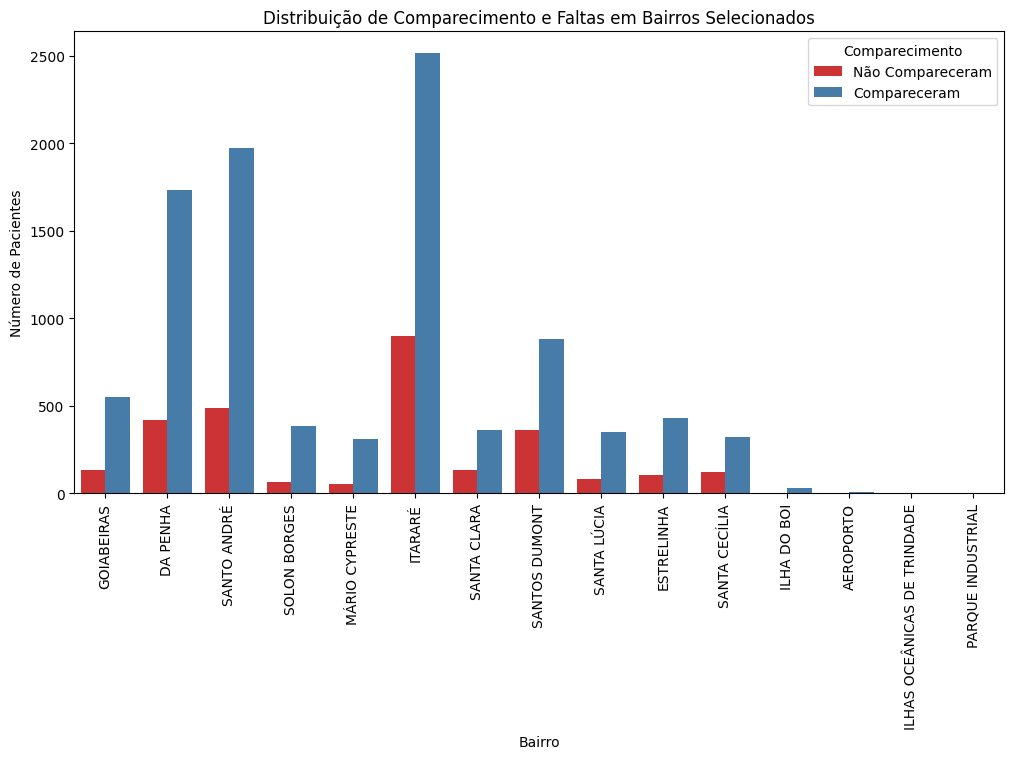

In [17]:
# Calculando a taxa de não comparecimento por bairro
bairro_faltas = data.groupby('Neighbourhood')['Showed_up'].mean()
bairro_faltas = 1 - bairro_faltas  # Taxa de não comparecimento (1 - taxa de comparecimento)

# Selecionando 5 bairros com maior taxa de falta
bairro_alta_falta = bairro_faltas.nlargest(5).index

# Selecionando 5 bairros com taxa de falta mediana
bairro_media_falta = bairro_faltas.sort_values().iloc[len(bairro_faltas)//2 - 2 : len(bairro_faltas)//2 + 3].index

# Selecionando 5 bairros com menor taxa de falta
bairro_baixa_falta = bairro_faltas.nsmallest(5).index

# Filtrando o DataFrame com os bairros selecionados
bairros_selecionados = data[data['Neighbourhood'].isin(bairro_alta_falta.union(bairro_media_falta).union(bairro_baixa_falta))]

# Gráfico de barras para os bairros selecionados
plt.figure(figsize=(12, 6))
sns.countplot(data=bairros_selecionados, x='Neighbourhood', hue='Showed_up', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribuição de Comparecimento e Faltas em Bairros Selecionados')
plt.xlabel('Bairro')
plt.ylabel('Número de Pacientes')
plt.legend(title="Comparecimento", labels=["Não Compareceram", "Compareceram"])
plt.show()


Os resultados indicam uma certa proporcionalidade entre o número de comparecimentos e não comparecimentos em cada bairro, o que parece estar mais relacionado ao número total de pacientes atendidos na região do que a características específicas de cada bairro. Não foram observadas variações muito significativas na taxa de não comparecimento entre os bairros.

**Implicações**

- **Estratégias Focadas por Região**: Embora as diferenças sejam pequenas, a análise pode ajudar a planejar campanhas específicas ou a alocar recursos em áreas com maior taxa de não comparecimento.
- **Monitoramento Contínuo**: Monitorar a taxa de não comparecimento ao longo do tempo em diferentes regiões pode revelar mudanças nos padrões, permitindo uma resposta mais eficaz e proativa.

**Conclusão**

A análise sugere que a localização geográfica, representada pelos bairros, não é um fator principal para o não comparecimento dos pacientes. Outros fatores, como condições de saúde específicas, podem influenciar mais no comportamento de comparecimento dos pacientes.



---
### 7. A comunicação via SMS tem algum efeito sobre a taxa de comparecimento?


Análise da Taxa de Não Comparecimento por Comunicação via SMS.

1. **Filtragem de Pacientes que Não Compareceram**:
- Inicialmente, criamos um subconjunto dos dados que contém apenas os pacientes que não compareceram às consultas, através do filtro `data[data['Showed_up'] == 0]`.

2. **Cálculo da Proporção de Não Comparecimento com Base no SMS**:
- Em seguida, calculamos a proporção de pacientes que não compareceram em relação ao recebimento de SMS, usando `value_counts(normalize=True)`.

3. **Visualização Gráfica**:
- O gráfico de barras exibe a proporção de pacientes que faltaram, comparando aqueles que receberam e os que não receberam SMS.



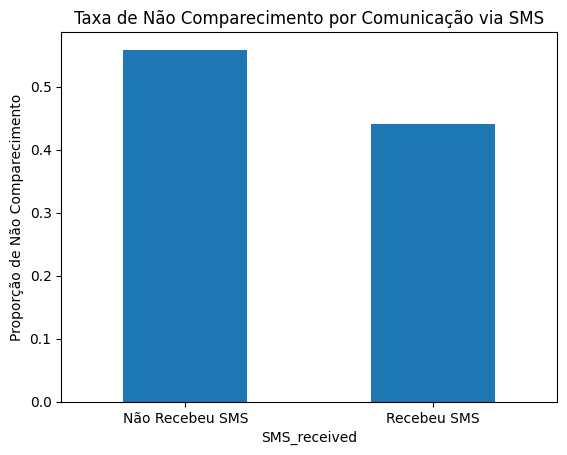

In [18]:
# Filtrando apenas os pacientes que não compareceram
nao_compareceram = data[data['Showed_up'] == 0]

# Análise da taxa de não comparecimento com base na comunicação via SMS
taxa_nao_comparecimento_sms = nao_compareceram['SMS_received'].value_counts(normalize=True)
taxa_nao_comparecimento_sms.plot(kind='bar', title='Taxa de Não Comparecimento por Comunicação via SMS')
plt.xticks(ticks=[0, 1], labels=['Não Recebeu SMS', 'Recebeu SMS'], rotation=0)
plt.ylabel('Proporção de Não Comparecimento')
plt.show()


**Resultados e Análise**

O gráfico mostra que uma proporção significativa de pacientes que não compareceram não havia recebido SMS. Isso sugere que a falta de uma notificação pode ter contribuído para o não comparecimento, destacando a importância das comunicações para reduzir as faltas.

**Conclusão**

Essa análise aponta que a comunicação via SMS pode desempenhar um papel importante na melhoria das taxas de comparecimento. Estratégias de lembrete, como o envio de SMS, poderiam ser mais exploradas para melhorar a adesão dos pacientes às consultas.



---

### 8. Como o tempo de espera entre o agendamento e a data da consulta afeta a taxa de comparecimento?

Análise da Distribuição de Densidade do Tempo de Espera por Comparecimento

1. **Configuração do Tamanho da Figura**:
- A figura é configurada para ter um tamanho de 10x6, proporcionando uma visualização clara do gráfico.

2. **Gráfico de Densidade (KDE Plot)**:
- Usamos `sns.kdeplot` para criar um gráfico de densidade que exibe a distribuição dos tempos de espera em dias, com uma diferenciação de cores para os pacientes que compareceram e os que não compareceram (`hue='Showed_up'`).
- `fill=True` preenche a área abaixo das curvas para facilitar a visualização.
- `common_norm=False` permite que cada grupo seja normalizado de forma independente, oferecendo uma visão mais precisa das distribuições relativas.

3. **Configuração dos Eixos e Títulos**:
- O eixo X representa o tempo de espera em dias, enquanto o eixo Y exibe a densidade.


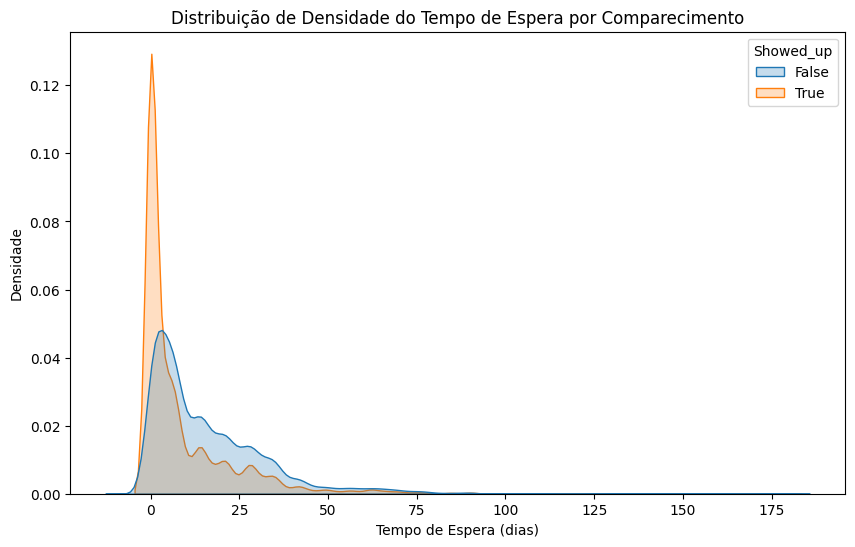

In [23]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Gráfico de densidade (KDE plot) para mostrar a distribuição do tempo de espera
sns.kdeplot(data=data, x='Tempo_Espera', hue='Showed_up', fill=True, common_norm=False)
plt.title("Distribuição de Densidade do Tempo de Espera por Comparecimento")
plt.xlabel("Tempo de Espera (dias)")
plt.ylabel("Densidade")
plt.show()



**Resultados e Análise**

O gráfico indica que pacientes que compareceram geralmente tiveram um tempo de espera menor, concentrado entre 0 e 25 dias. No entanto, pacientes que faltaram também apresentam tempos de espera variados, com uma parte significativa na mesma faixa (0-25 dias). Isso sugere que tempos de espera menores podem ter uma influência positiva no comparecimento, embora não garantam que todos os pacientes compareçam.

**Conclusão**

Essa análise reforça a importância de tempos de espera reduzidos para aumentar as taxas de comparecimento. Políticas de agendamento que minimizem os tempos de espera podem ser benéficas para melhorar a adesão dos pacientes às consultas.



---

### 9. A concessão de bolsas influencia a taxa de comparecimento dos pacientes?

Análise da Taxa de Comparecimento por Bolsa

1. **Cálculo da Taxa de Comparecimento por Bolsa**
- Utilizamos `groupby` para agrupar os dados pela coluna `Scholarship`, que indica se o paciente possui bolsa.
- Em seguida, calculamos a média da coluna `Showed_up` dentro de cada grupo.

2. **Contagem de quantos pacientes tinham bolsa ou não**:
- O resultado é exibido diretamente com `print`.
3. **Visualização da Taxa de Comparecimento**:
- Criamos um gráfico de barras com `plot(kind='bar')` para visualizar as diferenças entre os grupos.
- Os rótulos do eixo X são configurados como "Sem Bolsa" e "Com Bolsa" para fácil interpretação.

Contagem de ocorrências por bolsa:
Scholarship
False    96178
True     10809
Name: count, dtype: int64


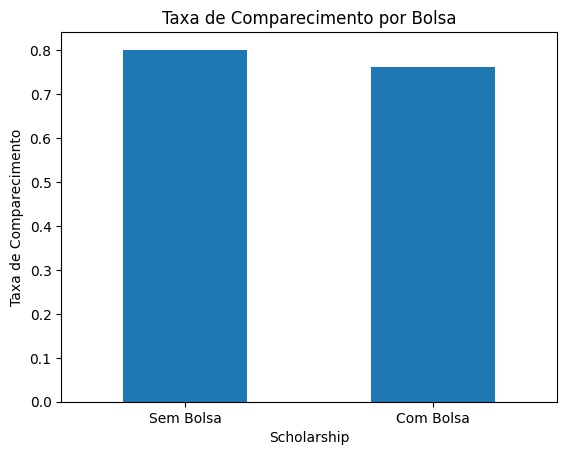

In [27]:
# Calculando a taxa de comparecimento para pacientes com e sem bolsa
taxa_comparecimento_bolsa = data.groupby('Scholarship')['Showed_up'].mean()

# Exibindo a taxa de comparecimento por bolsa
contagem_bolsa = data['Scholarship'].value_counts()
print("Contagem de ocorrências por bolsa:")
print(contagem_bolsa)

# Visualizando a taxa de comparecimento para pacientes com e sem bolsa
import matplotlib.pyplot as plt

taxa_comparecimento_bolsa.plot(kind='bar', title='Taxa de Comparecimento por Bolsa')
plt.xticks(ticks=[0, 1], labels=['Sem Bolsa', 'Com Bolsa'], rotation=0)
plt.ylabel('Taxa de Comparecimento')
plt.show()




O gráfico revela que pacientes sem bolsa(0.8) têm uma taxa de comparecimento ligeiramente superior aos que possuem bolsa(0.76). Isso pode refletir fatores externos, como compromissos financeiros e estabilidade, que podem influenciar o comparecimento de quem recebe benefícios. Embora a diferença seja sutil, entender essas variações pode ajudar na criação de políticas de engajamento para pacientes com suporte financeiro.  
É importante também considerarmos a diferença considerável entre pacientes com e sem bolsa. Indivíduos com bolsa correspondem a 9 vezes menos do que aqueles sem alguma bolsa. Assim, é possível entender que a grande maioria dos pacientes que utilizam de algum auxílio vão as consultas, exatamente por terem esse apoio quando necessário.  
  

**Conclusão**  
A análise sugere que pacientes sem bolsa tendem a comparecer um pouco mais frequentemente às consultas. Incentivar e apoiar a participação de pacientes com bolsa pode ajudar a reduzir essa diferença e melhorar a adesão ao atendimento médico.



---

### 10. Como a presença de condições como alcoolismo e deficiência afeta a frequência de comparecimento a consultas?

Análise da Contagem de Não Comparecimentos por Deficiência

1. **Filtragem dos Pacientes que Não Compareceram**:
- A variável `nao_compareceram` armazena os dados dos pacientes que não compareceram, ou seja, onde `Showed_up` é igual a 0.

2. **Gráfico de Contagem por Deficiência**:
- Utilizamos `sns.countplot` para contar e visualizar a quantidade de pacientes que não compareceram, separados pela variável `Handcap` (Deficiência).
- Configuramos os rótulos do eixo X como "Sem Deficiência" e "Com Deficiência" para fácil interpretação.

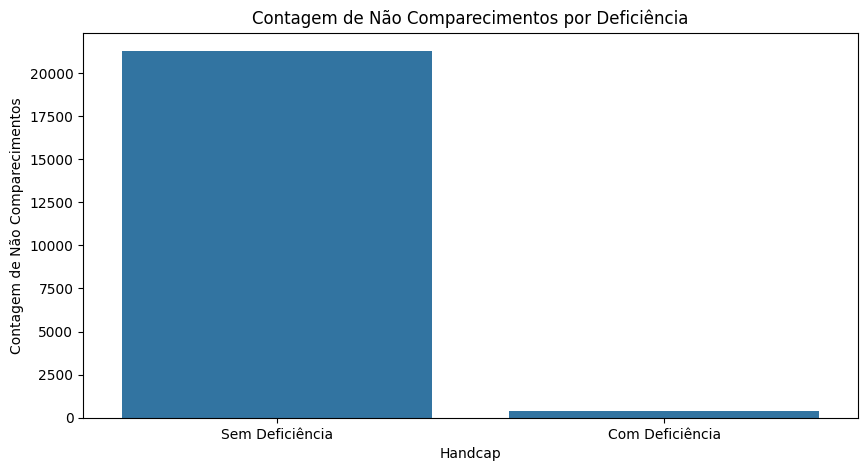

In [25]:
# Filtrando apenas os pacientes que não compareceram
nao_compareceram = data[data['Showed_up'] == 0]
# Gráfico de contagem para Deficiência
plt.figure(figsize=(10, 5))
sns.countplot(data=nao_compareceram, x='Handcap')
plt.title('Contagem de Não Comparecimentos por Deficiência')
plt.xticks(ticks=[0, 1], labels=['Sem Deficiência', 'Com Deficiência'])
plt.ylabel('Contagem de Não Comparecimentos')
plt.show()




- O gráfico revela que a maioria das faltas ocorre entre pacientes sem deficiência, indicando que pacientes com deficiência têm uma taxa de comparecimento superior.
- A diferença é considerável, uma vez que a quantidade de ausênsias é 10 vezes maior em pacientes sem deficiência. Contudo, também é importante levar em conta que a quantidade de indivíduos deficientes é razoavelmente menor.
- Esse comportamento pode ser atribuído a uma maior conscientização sobre a importância do acompanhamento médico entre pacientes com deficiência.

**Conclusão**

A análise indica que pacientes sem deficiência tendem a faltar com mais frequência, enquanto aqueles com deficiência mostram um comprometimento maior em comparecer às consultas. Esses insights podem ser úteis para adaptar políticas de comunicação e incentivo ao comparecimento, com foco específico nas necessidades de cada grupo.

# Conclusão Geral


A análise dos dados de comparecimento às consultas médicas revelou padrões significativos que podem ser utilizados para desenvolver estratégias destinadas a melhorar a adesão dos pacientes. Um dos achados mais notáveis foi que a faixa etária desempenha um papel crucial nas taxas de comparecimento. Pacientes jovens, especialmente aqueles entre 20 e 40 anos, mostraram-se mais propensos a não comparecer, enquanto crianças e idosos tendem a comparecer com maior frequência. Isso pode ser atribuído ao fato de que crianças muitas vezes são acompanhadas por responsáveis preocupados com a saúde, enquanto os idosos, que podem ter mais problemas de saúde, demonstram maior comprometimento em atender às consultas.

Além disso, a análise dos fatores de saúde revelou que pacientes com hipertensão e diabetes têm taxas de não comparecimento mais baixas. Isso sugere que essas condições podem levar a uma maior conscientização sobre a importância do acompanhamento médico. Em contrapartida, a falta de comunicação efetiva, como a ausência de mensagens SMS lembrando os pacientes sobre suas consultas, resultou em uma maior taxa de faltas. Isso enfatiza a importância de estratégias de comunicação proativas para aumentar a adesão.

Outro fator importante identificado foi a relação entre a presença de deficiências e o comparecimento. Os dados mostraram que pacientes sem deficiência faltam com mais frequência em comparação com aqueles que têm algum tipo de deficiência. Essa informação pode indicar a necessidade de um suporte adicional para aqueles sem deficiência, que pode incluir incentivos ou serviços de transporte.

Por fim, a análise revelou disparidades de comparecimento entre diferentes bairros, destacando a importância de intervenções localizadas que abordem as necessidades específicas das comunidades. Estrategicamente, ações que considerem fatores como a comunicação, o suporte financeiro (como bolsas), e a redução do tempo de espera podem ser implementadas para incentivar o comparecimento e, assim, melhorar a saúde geral da população. Essas informações são essenciais para a formulação de políticas de saúde pública mais eficazes, que visem aumentar a adesão às consultas médicas e, consequentemente, a saúde da comunidade.